# Regresión polinomial


La regresión *lineal* polinómica es una caso especial de regresión lineal simple. Su expresión matemática es la siguiente:

$$
y = b_{0} + b_{1}x_{1} + b_{2}x_{1}^{2} + ... + b_{n}x_{1}^{n}
$$

El hecho de que se siga llamando *lineal* cuando las variables son claramente no-lineales es debido a que no nos fijamos en dichas variables sino en los coeficientes que acompañan a dichas variables. Estos coeficientes son las incognitas que queremos averiguar y estos son lineales respecto a la *salida* o variable *y*.



Vamos a crear un *dataset* sintético que nos sirva como base para aplicar la teoría anterior.

Para que el ajuste no sea perfecto vamos a añadir a nuestros datos sintéticos un poco de ruido.

## Importando bibliotecas

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()
np.random.seed(42)

In [2]:
colores = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']

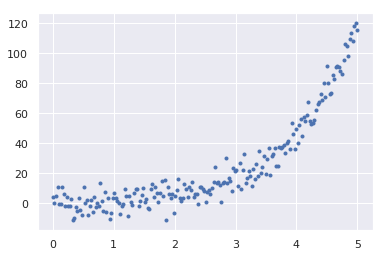

In [3]:
# Data
X = np.linspace(0, 5, 200)
res = 6.4 * np.random.randn(200)
y = res + 0.83 * np.exp(X)
plt.plot(X, y,
         marker='.', linestyle='none')
plt.show()

Una vez generados los datos sintéticos vamos a continuar realizando, tanto una regresión lineal simple como una regresión lineal **polinómica** y veamos las diferencias entre ellas.

### Regresión lineal simple

Comenzamos con la regresión lineal simple para poder hacer una comparativa con la regresión lineal polinómica. Así veremos si hay realmente un mejor ajuste, y como influye este ajuste a las métricas.

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Reshape the data
X = np.reshape(a=X, newshape=(-1, 1))
y = np.reshape(a=y, newshape=(-1, 1))

# fitting
regressor.fit(X, y)
y_pred = regressor.predict(X)

### Visualización de los resultados

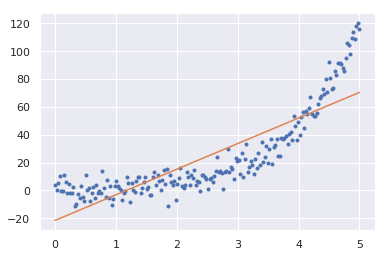

In [5]:
# Visualizando la predicción
plt.plot(X, y, marker='.', linestyle='none')
plt.plot(X, y_pred)
plt.show()

### Métrica

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean squared error
MSE = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean squared error: {0} \n r2: {1}'.format(MSE, r2))

Mean squared error: 274.53584989234764 
 r2: 0.7219707827302568


## Regresión polinómica

Vamos a realizar un pequeño ejemplo para ver como funciona la clase *PolynomialFeatures*

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Ejemplo de uso de PolynomialFeatures
x = np.reshape(np.linspace(1,5,5), newshape=(-1,1))

# Iniciamos la clase de grado 3
poly = PolynomialFeatures(degree = 3)

# Transformamos nuestros datos
x_poly = poly.fit_transform(x)

# visualizamos
print(x_poly)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


Iniciamos una nueva instancia e intentamos encontrar un mejor ajuste a los datos.

In [8]:
# Importamos bibliotecas
from sklearn.preprocessing import PolynomialFeatures

# Llamamos a la clase
poly_reg = PolynomialFeatures(degree = 2)
regressor_2 = LinearRegression()

# fit transform
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

# predict
regressor_2.fit(X_poly, y)
y_pred_poly = regressor_2.predict(poly_reg.fit_transform(X))

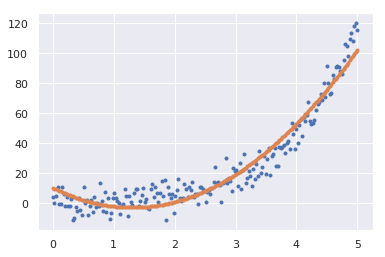

In [9]:
# Visualizando la predicción
plt.plot(X, y, marker='.', linestyle='none')
plt.plot(X, y_pred_poly, marker='.', linestyle='-')
plt.show()

### Usando pipelines

Función:
```
 sklearn.pipeline.make_pipeline(*steps, **kwargs)[source]
```

Vamos a explicar la función anterior con un ejemplo.

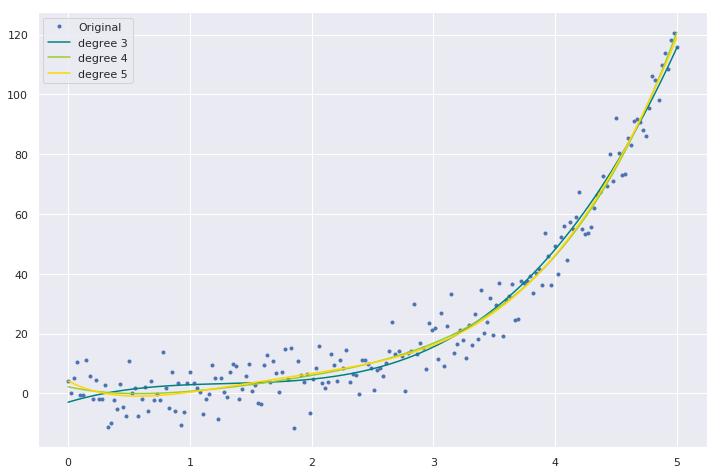

In [10]:
# Importamos biblioteca para la pipeline
from sklearn.pipeline import make_pipeline

# colores
colors = ['teal', 'yellowgreen', 'gold']

# Representamos los datos originales
plt.figure(figsize=(12,8))
plt.plot(X, y,
         marker='.', linestyle='none',
         label='Original')

# Modelo
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred_poly = model.predict(X)
    plt.plot(X, y_pred_poly,
             color=colors[count], linestyle='-',
             label="degree %d" % degree)
plt.legend()
plt.show()    

### Métricas

* $R^2$
* MSE

In [11]:
MSE_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("Mean squared error: {0} \n r2: {1}".format(MSE_poly, r2_poly))

Mean squared error: 33.83979366111978 
 r2: 0.9657296074525056


## Comparamos los modelos obtenidos

### Métricas

In [12]:
print("Métricas para la regresión lineal: \n mse: {0} r2: {1}".format(MSE, r2))
print("Métricas para la regresión polinómica: \n mse: {0} r2: {1}".format(MSE_poly, r2_poly))

Métricas para la regresión lineal: 
 mse: 274.53584989234764 r2: 0.7219707827302568
Métricas para la regresión polinómica: 
 mse: 33.83979366111978 r2: 0.9657296074525056


Como era de esperar, hemos obtenido mejores resultados para la regresión polinómica. 

Un último gráfico comparativo entre ambas regresiones y los datos originales

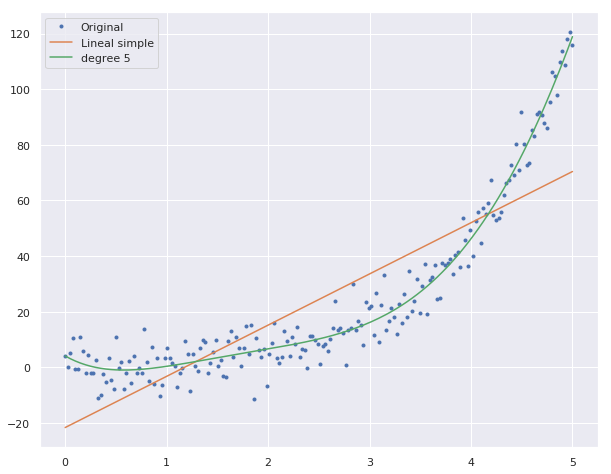

In [13]:
plt.figure(figsize=(10,8))

#original
plt.plot(X, y,
         marker='.', linestyle='none',
         label='Original')
# Regresión lineal simple
plt.plot(X, y_pred,
         linestyle='-', label='Lineal simple')

# Regresión polinómica
plt.plot(X, y_pred_poly,
             linestyle='-',
             label="degree %d" % degree)

plt.legend()
plt.show()

## Guardando información

In [14]:
"""import pandas as pd

matrix = np.concatenate(X,y, axis=1)
matrix.to_csv('data/data.csv')"""

"import pandas as pd\n\nmatrix = np.concatenate(X,y, axis=1)\nmatrix.to_csv('data/data.csv')"